In [1]:
%load_ext autoreload
%autoreload 2

from collections import defaultdict

import dvu
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
import os.path
from tqdm import tqdm
import pathlib
import imodelsx.llm
import json
import requests
import numpy as np
import openai
import pubmed
import paper_parsing
import prompts
openai.api_key = open('/home/chansingh/.OPENAI_KEY').read().strip()
plt.style.use('default')
dvu.set_style()

In [2]:
df = pd.read_csv('../data/main.csv')

### Look at gender ratios

In [3]:
idxs = (df['num_male_corrected'].notnull() & ~(df['num_male_corrected'] == 'Unk')) & (df['num_female_corrected'].notnull() & ~(df['num_female_corrected'] == 'Unk'))
male = df['num_male_corrected'][idxs].astype(int)
female = df['num_female_corrected'][idxs].astype(int)

In [4]:
ratios = (male / female).values
# drop inf
print(sorted(ratios))

[0.14014251781472684, 0.2193158953722334, 0.2647058823529412, 0.2787716579799972, 0.33684794672586016, 0.48488180318856516, 0.6142857142857143, 0.6239465271723337, 0.6948228882833788, 0.7525252525252525, 0.7727272727272727, 0.8007149240393209, 0.8623481781376519, 0.8714985994397759, 0.9905170692753045, 1.0, 1.0202908353060534, 1.035598705501618, 1.0408163265306123, 1.0549132947976878, 1.0678336980306347, 1.1, 1.1097099621689785, 1.1218274111675126, 1.1768292682926829, 1.1854636591478698, 1.1989247311827957, 1.2203389830508475, 1.2721437740693196, 1.273611734770244, 1.2791970802919708, 1.2903225806451613, 1.290983606557377, 1.308411214953271, 1.3203883495145632, 1.329512893982808, 1.3586887332908975, 1.5063025210084033, 1.5103448275862068, 1.5565217391304347, 1.5641197497765862, 1.6241316270566728, 1.75, 1.763157894736842, 1.7872340425531914, 1.790874524714829, 2.0, 2.1218195836545877, 2.193548387096774, 2.2580645161290325, 2.325925925925926, 2.4, 2.4731920199501247, 2.5625, 3.099099099

mean 1.8000640350691475 frac>0 42 / 58 excluding 4 all-male studies


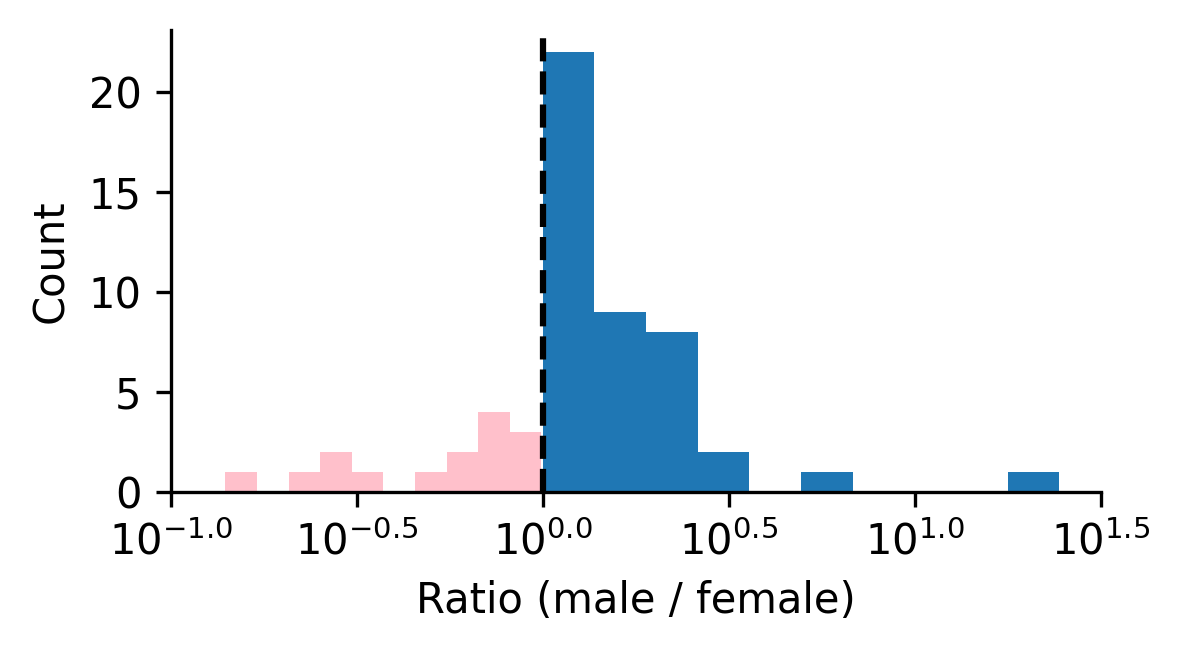

In [6]:
plt.figure(figsize=(4, 2), dpi=300)
r = ratios[~np.isinf(ratios)]
logr = np.log10(r)
print('mean', r.mean(), 'frac>0', (r > 1).sum(), '/', len(r), 'excluding', len(ratios) - len(r), 'all-male studies')
plt.hist(logr[logr < 0], color='pink') #, bins=100)
plt.hist(logr[logr >= 0], color='C0') #, bins=100)
plt.axvline(0, color='black', ls='--')
ticks = plt.xticks()[0]
plt.xticks(ticks, [f'$10^{{{t}}}$' for t in ticks])
plt.xlabel('Ratio (male / female)')
plt.ylabel('Count')
plt.show()